# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [5]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [63]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [64]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [65]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [66]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))
    #print (grads[param_name])

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


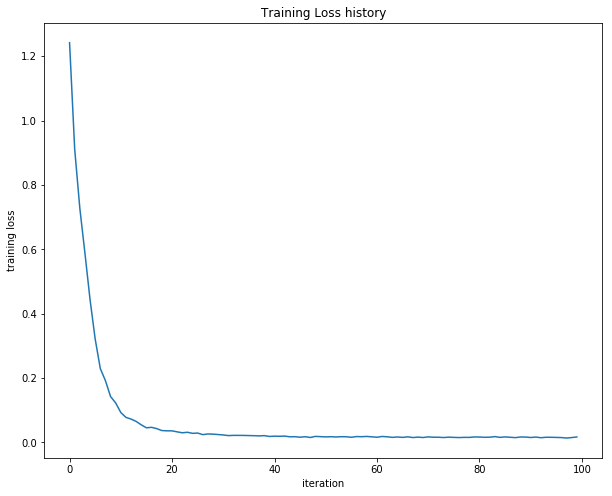

In [67]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [6]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [73]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302957
iteration 100 / 1000: loss 2.302576
iteration 200 / 1000: loss 2.298401
iteration 300 / 1000: loss 2.263794
iteration 400 / 1000: loss 2.199835
iteration 500 / 1000: loss 2.103390
iteration 600 / 1000: loss 2.033097
iteration 700 / 1000: loss 2.042297
iteration 800 / 1000: loss 2.007256
iteration 900 / 1000: loss 1.976159
Validation accuracy:  0.285


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

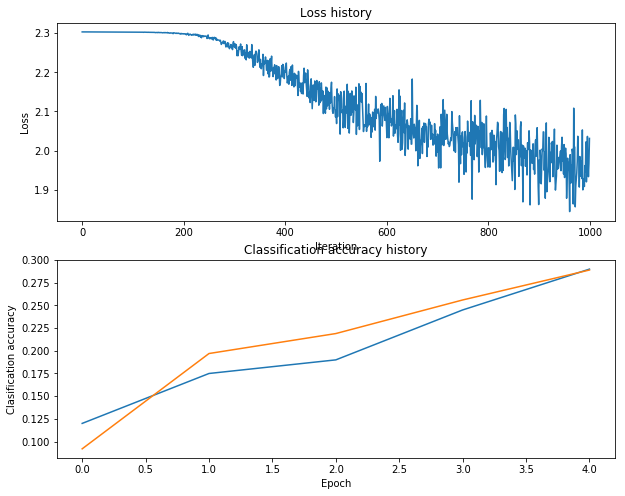

In [75]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

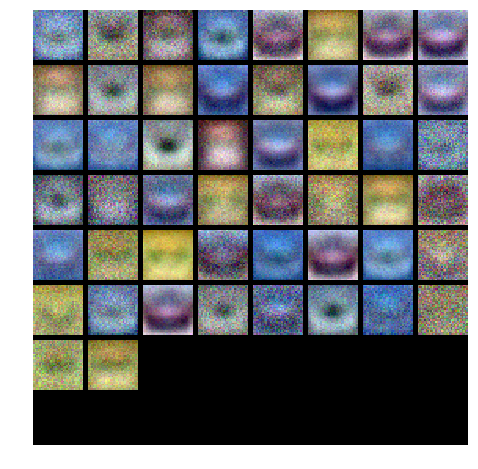

In [76]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

"""
We see that there are several nodes representing either car class (red in color) or several blue nodes representing 
either ship or plane etc
"""

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [95]:
best_net = None # store the best model into this 
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
np.random.seed(1)
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
learning_rates = [3e-3]
regularization_strengths = [0.2, 0.25, 0.5, 1.0]
hidden_sizes = [50, 100]



#learning_rates = [ 1e-1, 5e-7, 1e-6]
#regularization_strengths = [4e5, 5e5, 6e5]

nets = {}
for lr in learning_rates:
    for reg in regularization_strengths:
        for hidden_size in hidden_sizes:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)
            y_val_pred = net.predict(X_val)
            y_train_pred = net.predict(X_train)
            val_accuracy = np.mean(y_val == y_val_pred)
            train_accuracy = np.mean(y_train == y_train_pred)
            results[(lr, reg, hidden_size)] = (train_accuracy, val_accuracy)
            nets[(lr, reg, hidden_size)] = net

# Print out results.
for lr, reg, hidden_size in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hidden_size)]
    print('lr %e reg %e hidden_size %e train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
    if best_val < val_accuracy :
        best_val = val_accuracy
        best_net = nets[(lr, reg, hidden_size)]
        
print('best validation accuracy achieved during cross-validation: %f' % best_val)        
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 2000: loss 2.302840
iteration 100 / 2000: loss 1.711736
iteration 200 / 2000: loss 1.896558
iteration 300 / 2000: loss 1.756014
iteration 400 / 2000: loss 1.853860
iteration 500 / 2000: loss 1.645500
iteration 600 / 2000: loss 1.745984
iteration 700 / 2000: loss 1.714577
iteration 800 / 2000: loss 1.670481
iteration 900 / 2000: loss 1.923020
iteration 1000 / 2000: loss 1.502728
iteration 1100 / 2000: loss 1.754672
iteration 1200 / 2000: loss 1.642293
iteration 1300 / 2000: loss 1.603509
iteration 1400 / 2000: loss 1.429616
iteration 1500 / 2000: loss 1.531343
iteration 1600 / 2000: loss 1.629518
iteration 1700 / 2000: loss 1.578872
iteration 1800 / 2000: loss 1.581643
iteration 1900 / 2000: loss 1.665319
iteration 0 / 2000: loss 2.303181
iteration 100 / 2000: loss 1.759765
iteration 200 / 2000: loss 1.640613
iteration 300 / 2000: loss 1.654724
iteration 400 / 2000: loss 1.969496
iteration 500 / 2000: loss 1.697628
iteration 600 / 2000: loss 1.727312
iteration 700 / 2000: 

In [ ]:
 Achieved  cross validation of 49% using the following parameters
    
lr 3.000000e-03 reg 2.000000e-01 hidden_size 5.000000e+01 train accuracy: 0.522245 val accuracy: 0.489000

Started with tuning the best learning rate and then did a random search on reg values.       

In [37]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
lr = 3e-3
reg = 0.2
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 3000: loss 2.302918
iteration 100 / 3000: loss 1.897957
iteration 200 / 3000: loss 1.762954
iteration 300 / 3000: loss 1.763300
iteration 400 / 3000: loss 1.749206
iteration 500 / 3000: loss 1.444628
iteration 600 / 3000: loss 1.515536
iteration 700 / 3000: loss 1.529511
iteration 800 / 3000: loss 1.519738
iteration 900 / 3000: loss 1.679604
iteration 1000 / 3000: loss 1.554584
iteration 1100 / 3000: loss 1.635914
iteration 1200 / 3000: loss 1.466483
iteration 1300 / 3000: loss 1.540887
iteration 1400 / 3000: loss 1.504237
iteration 1500 / 3000: loss 1.986936
iteration 1600 / 3000: loss 1.449825
iteration 1700 / 3000: loss 1.478475
iteration 1800 / 3000: loss 1.542765
iteration 1900 / 3000: loss 1.669955
iteration 2000 / 3000: loss 1.595945
iteration 2100 / 3000: loss 1.565361
iteration 2200 / 3000: loss 1.558618
iteration 2300 / 3000: loss 1.452223
iteration 2400 / 3000: loss 1.507266
iteration 2500 / 3000: loss 1.526610
iteration 2600 / 3000: loss 1.614192
iteration 270

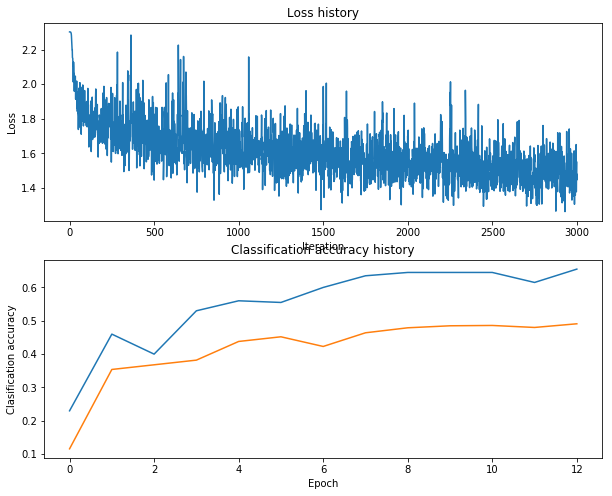

In [38]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [ ]:
"""
We observe with the new regularization and learning rates that
1) loss function decrease is non-linear and hence learning rate might be close to ideal learning rate
2) There is good amount of gap  between training and validation curves indicating over fitting.
3) We shall remove overfitting using drop out features in bonus section to 
increase the test accuracy to 52%
"""

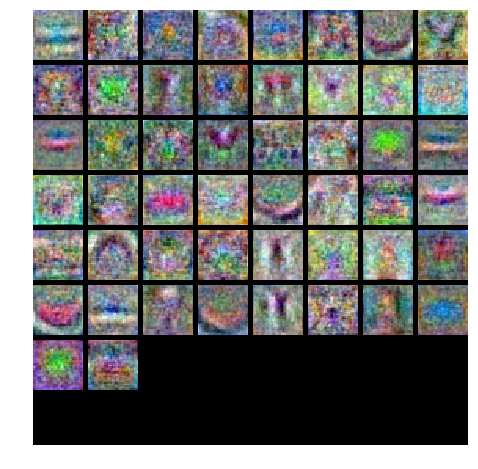

In [96]:
# visualize the weights of the best network
show_net_weights(best_net)

"""
We observe that the weights for 10 classes are now distributed among 50 classes. 
For example, the three green centred classes (2X2,  3X7, 7X1) with different intensities probably 
correspond to the frog 
"""



# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [97]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.495


In [27]:
"""
## BONUS
We implement drop out in cs231n/classifiers/neural_net_dropout.py to find if we can improve the test accuracy
"""

from cs231n.classifiers.neural_net_dropout import TwoLayerNetWithDropOut
best_net_dropout = None # store the best model into this 
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
np.random.seed(1)

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10


learning_rates = [1e-3]
regularization_strengths = [ 1e-3]
hidden_sizes = [300, 400, 500]

net = TwoLayerNetWithDropOut(input_size, hidden_size, num_classes)

nets = {}
for lr in learning_rates:
    for reg in regularization_strengths:
        for hidden_size in hidden_sizes:
            net = TwoLayerNetWithDropOut(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=4000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, do_dropout = True, dropout_percent = 0.3, verbose=True)
            y_val_pred = net.predict(X_val)
            y_train_pred = net.predict(X_train)
            val_accuracy = np.mean(y_val == y_val_pred)
            train_accuracy = np.mean(y_train == y_train_pred)
            results[(lr, reg, hidden_size)] = (train_accuracy, val_accuracy)
            nets[(lr, reg, hidden_size)] = net

# Print out results.
for lr, reg, hidden_size in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hidden_size)]
    print('lr %e reg %e hidden_size %e train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
    if best_val < val_accuracy :
        best_val = val_accuracy
        best_net_dropout = nets[(lr, reg, hidden_size)]
        
print('best validation accuracy achieved during cross-validation: %f' % best_val)     




iteration 0 / 4000: loss 2.302666
iteration 100 / 4000: loss 1.938073
iteration 200 / 4000: loss 1.758449
iteration 300 / 4000: loss 1.769499
iteration 400 / 4000: loss 1.576260
iteration 500 / 4000: loss 1.559387
iteration 600 / 4000: loss 1.438790
iteration 700 / 4000: loss 1.557218
iteration 800 / 4000: loss 1.528872
iteration 900 / 4000: loss 1.438022
iteration 1000 / 4000: loss 1.417605
iteration 1100 / 4000: loss 1.466318
iteration 1200 / 4000: loss 1.356785
iteration 1300 / 4000: loss 1.310118
iteration 1400 / 4000: loss 1.314685
iteration 1500 / 4000: loss 1.324921
iteration 1600 / 4000: loss 1.418261
iteration 1700 / 4000: loss 1.250055
iteration 1800 / 4000: loss 1.357138
iteration 1900 / 4000: loss 1.282633
iteration 2000 / 4000: loss 1.260830
iteration 2100 / 4000: loss 1.291153
iteration 2200 / 4000: loss 1.298408
iteration 2300 / 4000: loss 1.268567
iteration 2400 / 4000: loss 1.329441
iteration 2500 / 4000: loss 1.373696
iteration 2600 / 4000: loss 1.251424
iteration 270

In [ ]:
# Drop out = 0.2

lr 1.000000e-03 reg 1.000000e-03 hidden_size 1.000000e+02 train accuracy: 0.496878 val accuracy: 0.475000
lr 1.000000e-03 reg 1.000000e-03 hidden_size 2.000000e+02 train accuracy: 0.541449 val accuracy: 0.497000
lr 1.000000e-03 reg 1.000000e-03 hidden_size 3.000000e+02 train accuracy: 0.571082 val accuracy: 0.524000
lr 1.000000e-03 reg 1.000000e-02 hidden_size 1.000000e+02 train accuracy: 0.493245 val accuracy: 0.442000
lr 1.000000e-03 reg 1.000000e-02 hidden_size 2.000000e+02 train accuracy: 0.546510 val accuracy: 0.516000
lr 1.000000e-03 reg 1.000000e-02 hidden_size 3.000000e+02 train accuracy: 0.568980 val accuracy: 0.511000
lr 1.000000e-03 reg 1.000000e-01 hidden_size 1.000000e+02 train accuracy: 0.494857 val accuracy: 0.466000
lr 1.000000e-03 reg 1.000000e-01 hidden_size 2.000000e+02 train accuracy: 0.540755 val accuracy: 0.508000
lr 1.000000e-03 reg 1.000000e-01 hidden_size 3.000000e+02 train accuracy: 0.560306 val accuracy: 0.512000
lr 3.000000e-03 reg 1.000000e-03 hidden_size 1.000000e+02 train accuracy: 0.493592 val accuracy: 0.447000
lr 3.000000e-03 reg 1.000000e-03 hidden_size 2.000000e+02 train accuracy: 0.571510 val accuracy: 0.496000
lr 3.000000e-03 reg 1.000000e-03 hidden_size 3.000000e+02 train accuracy: 0.598122 val accuracy: 0.523000
lr 3.000000e-03 reg 1.000000e-02 hidden_size 1.000000e+02 train accuracy: 0.514878 val accuracy: 0.486000
lr 3.000000e-03 reg 1.000000e-02 hidden_size 2.000000e+02 train accuracy: 0.567204 val accuracy: 0.509000
lr 3.000000e-03 reg 1.000000e-02 hidden_size 3.000000e+02 train accuracy: 0.543306 val accuracy: 0.461000
lr 3.000000e-03 reg 1.000000e-01 hidden_size 1.000000e+02 train accuracy: 0.505796 val accuracy: 0.468000
lr 3.000000e-03 reg 1.000000e-01 hidden_size 2.000000e+02 train accuracy: 0.524837 val accuracy: 0.461000
lr 3.000000e-03 reg 1.000000e-01 hidden_size 3.000000e+02 train accuracy: 0.550224 val accuracy: 0.483000
best validation accuracy achieved during cross-validation: 0.524000
    
# Drop out = 0.3   and num iterations = 4000
lr 1.000000e-03 reg 1.000000e-03 hidden_size 3.000000e+02 train accuracy: 0.590306 val accuracy: 0.496000
lr 1.000000e-03 reg 1.000000e-03 hidden_size 4.000000e+02 train accuracy: 0.602837 val accuracy: 0.510000
lr 1.000000e-03 reg 1.000000e-03 hidden_size 5.000000e+02 train accuracy: 0.614959 val accuracy: 0.525000    

In [34]:
curr_best_dropout = best_net_dropout
#lr 1.000000e-03 reg 1.000000e-03 hidden_size 3.000000e+02 train accuracy: 0.571082 val accuracy: 0.524000

test_acc = (curr_best_dropout.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.526
